In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../data/fromAPI/cleaned_hourly_all.csv")

In [3]:
date_format = "%Y-%m-%d %H:%M:%S"
df["arrival_plan"] = pd.to_datetime(df["arrival_plan"], format=date_format)
df["departure_plan"] = pd.to_datetime(df["departure_plan"], format=date_format)
df["arrival_change"] = pd.to_datetime(df["arrival_change"], format=date_format)
df["departure_change"] = pd.to_datetime(df["departure_change"], format=date_format)
df["arrival_plan_hour"] = df["arrival_plan"].dt.hour


In [4]:
df.dropna(subset=["arrival_plan"], inplace=True)

In [5]:
ml_arrival = df.drop([
    'ID', 'train', 'path', 'eva_nr', 'category', 
    #'name', 
    'state', 
    'city',
    'zip', 
    #'long', 'lat', 
    'arrival_plan', 'departure_plan',
    'arrival_change', 'departure_change', 'arrival_delay_m',
    'depature_delay_m', 
    'hour', 
    #'arrival_delay_check',
    'departure_delay_check'
    #'arrival_plan_hour'
    ], axis=1)

In [6]:
ml_arrival.loc[ml_arrival["arrival_delay_check"] == "long_delay", ["arrival_delay_check"]] = "delay"

In [7]:
ml_arrival.head()

,name,long,lat,arrival_delay_check,arrival_plan_hour
0,Aachen Hbf,6.091499,50.7678,on_time,13.0
1,Aachen Hbf,6.091499,50.7678,on_time,13.0
7,Aachen Hbf,6.091499,50.7678,on_time,13.0
8,Aachen Hbf,6.091499,50.7678,on_time,13.0
10,Aachen Hbf,6.091499,50.7678,delay,13.0


In [8]:
ml_arrival.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1241603 entries, 0 to 1370586
Data columns (total 5 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   name                 1241603 non-null  object 
 1   long                 1241603 non-null  float64
 2   lat                  1241603 non-null  float64
 3   arrival_delay_check  1241603 non-null  object 
 4   arrival_plan_hour    1241603 non-null  float64
dtypes: float64(3), object(2)
memory usage: 56.8+ MB


In [9]:
ml_arrival.name.nunique()

1996

In [10]:
ml_arrival.arrival_delay_check.value_counts()

arrival_delay_check
on_time    1135941
delay       105662
Name: count, dtype: int64

In [11]:
ml_arrival_bystations = pd.get_dummies(ml_arrival, columns=["name"])

In [12]:
ml_arrival_bystations.head()

,long,lat,arrival_delay_check,arrival_plan_hour,name_Aachen Hbf,name_Aachen Schanz,name_Aachen West,name_Aachen-Rothe Erde,name_Aalen Hbf,name_Achern,...,name_Zorneding,name_Zossen,name_Zweibrücken Hbf,name_Zwickau (Sachs) Hbf,name_Zwingenberg (Bergstr),name_Züssow,name_Öhringen Hbf,name_Ötigheim,name_Übach-Palenberg,name_Übersee
0,6.091499,50.7678,on_time,13.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,6.091499,50.7678,on_time,13.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,6.091499,50.7678,on_time,13.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,6.091499,50.7678,on_time,13.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10,6.091499,50.7678,delay,13.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [14]:
X = ml_arrival_bystations.drop('arrival_delay_check',axis=1)
y = ml_arrival_bystations['arrival_delay_check']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, shuffle=True, stratify=y)

In [15]:
dtree = RandomForestClassifier(random_state=42, n_estimators=100, verbose=3, n_jobs=-1, max_depth=None)
dtree.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 100building tree 2 of 100

building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  2.4min


building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 14.1min finished


RandomForestClassifier(max_depth=8, n_jobs=-1, random_state=42, verbose=3)

In [16]:
y_pred = dtree.predict(X_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


In [17]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.91
Classification Report:


/Users/nokkyu/Documents/greenbootcamps/FinalProject/SavingDB/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/nokkyu/Documents/greenbootcamps/FinalProject/SavingDB/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/nokkyu/Documents/greenbootcamps/FinalProject/SavingDB/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_

              precision    recall  f1-score   support

       delay       0.00      0.00      0.00     21132
     on_time       0.91      1.00      0.96    227189

    accuracy                           0.91    248321
   macro avg       0.46      0.50      0.48    248321
weighted avg       0.84      0.91      0.87    248321

Confusion Matrix:
[[     0  21132]
 [     0 227189]]


In [18]:
import seaborn as sns
import numpy as np

Text(50.581597222222214, 0.5, 'True')

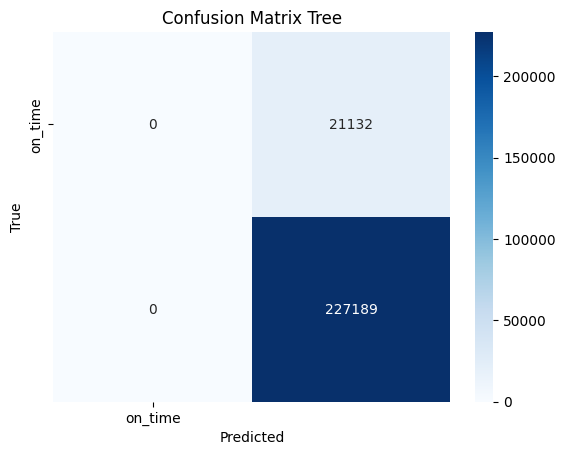

In [19]:
cmat = confusion_matrix(y_test, y_pred)
fig = sns.heatmap(cmat, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_pred), yticklabels=np.unique(y_pred))
fig.set_title('Confusion Matrix Tree')
fig.set_xlabel('Predicted')
fig.set_ylabel('True')

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
#model = DecisionTreeClassifier(random_state=42)

NameError: name 'DecisionTreeClassifier' is not defined

In [ ]:
# param_grid = { 
#     #'criterion': ['gini', 'entropy'],
#     'max_depth': [4,8, None],
#     #'min_samples_split': [2,8,16],
# }
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, 
#     #scoring="f1",
#     verbose=3,
    
    
#     ) #scoring defaults to accuracy if not stated otherwise, n_jobs=-1 means use all available cores for computing.
# grid_search.fit(X_train, y_train)
# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ..max_depth=8, min_samples_split=2;, score=0.915 total time=  54.7s
[CV 2/5] END ..max_depth=8, min_samples_split=2;, score=0.915 total time=  51.7s
[CV 3/5] END ..max_depth=8, min_samples_split=2;, score=0.915 total time=  52.7s
[CV 4/5] END ..max_depth=8, min_samples_split=2;, score=0.915 total time=  52.4s
[CV 5/5] END ..max_depth=8, min_samples_split=2;, score=0.915 total time=  49.9s
[CV 1/5] END ..max_depth=8, min_samples_split=8;, score=0.915 total time=  48.5s
[CV 2/5] END ..max_depth=8, min_samples_split=8;, score=0.915 total time=  49.9s
[CV 3/5] END ..max_depth=8, min_samples_split=8;, score=0.915 total time=  50.3s
[CV 4/5] END ..max_depth=8, min_samples_split=8;, score=0.915 total time=  51.0s
[CV 5/5] END ..max_depth=8, min_samples_split=8;, score=0.915 total time=  49.4s
[CV 1/5] END .max_depth=8, min_samples_split=16;, score=0.915 total time=  50.5s
[CV 2/5] END .max_depth=8, min_samples_split=16;,

In [ ]:
# print(best_params)